# Валидация. Метрики качества ML-модели

Стурктура:   
1. Метрики качества    
   1.1 Функционал ошибки (Loss functions линейной и логистической регрессий)     
   1.2 Функционал качества логистической регрессии (Accuracy, Precision, Recall, F1-Score, Precision-recall curve и др.)   
2. Практика

In [89]:
# Загрузим необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, cross_validate, 
                                     StratifiedShuffleSplit, LeaveOneOut)
from sklearn.metrics import (log_loss, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, average_precision_score,
                             balanced_accuracy_score, cohen_kappa_score) 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams['figure.figsize'] = (5, 3)

# 1. Метрики качества 

## 1.1 Функционал ошибки (Loss functions линейной и логистической регрессий)

Самой базовой метрикой алгоритма является функция ошибки, т.е. функция минимизируемого функционала.  

## Линейная регрессия  
**MSE ([Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)) - сумма квадратов ошибок / среднеквадратическая ошибка**:
$$
MSE=\frac{1}{n}\sum_{i=1}^{n}({Y_i-\hat{Y}_i})^2,
$$
где $n$ — количество примеров, $Y_i$ — истинные значения, $\hat{Y_i}$ — предсказанные моделью значения.

**Другие метрики:**

**MAE** *(Mean Absolute Error)*.   
- Среднее арифметическое модуля отклонения предсказанного значения от реального.
\begin{equation}\mathrm{MAE}=\frac{1}{m} \sum_{i=1}^{m}\left|a_{i}-y_{i}\right|\end{equation}


**RMSE** *(Root Mean Squared Error)*.  
- Корень из MSE. В силу того, что при подсчете этой метрики извлекается корень, значения возвращаются в масштабе целевой переменной и интерпретация становится проще.
\begin{equation}\mathrm{RMSE}=\sqrt{\mathrm{MSE}}=\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left|a_{i}-y_{i}\right|^{2}}\end{equation}

**MAPE** *(Mean Absolute Percent Error).*   
- Показывает на сколько процентов в среднем предсказание модели отклоняется от реального значения.
\begin{equation}\mathrm{MAPE}=100 \% \cdot \frac{1}{m} \sum_{i=1}^{m} \frac{\left|y_{i}-a_{i}\right|}{\left|y_{i}\right|}\end{equation}

**SMAPE** *(Symmetric Mean Absolute Percentage Error)*
\begin{equation}\mathrm{SMAPE}=\frac{2}{q} \sum_{i=1}^{m} \frac{\left|y_{i}-a_{i}\right|}{y_{i}+a_{i}}=100 \% \cdot \frac{1}{m} \sum_{i=1}^{m} \frac{\left|y_{i}-a_{i}\right|}{\left(y_{i}+a_{i}\right) / 2}\end{equation}

Функции SMAPE и MAPE довольно часто используют при прогнозировании временных рядов, особенно финансовых, где разумнее всего измерять ошибку в процентах. Эти метрики уместно использовать при работе с представителями менеджмента, так как при расчете рисков и обсуждении результатов наиболее интуитивно понятной является именно разница в процентах. Эти метрики наиболее легко интерпретируемы.

Также существует целый **класс функций ошибок, основанных на сравнении с некоторым бенчмарком** (ориентиром / эталоном).  
Обозначим за  a'  — метки бенчмарка:

**MRAE** *(Mean Relative Absolute Error)*  
- Позволяет выявить среднее отношение ошибок, полученных алгоритмом и бенчмарком. 
\begin{equation}\mathrm{MRAE}=\frac{1}{m} \sum_{i=1}^{m} \frac{\left|y_{i}-a_{i}\right|}{\left|y_{i}-a_{i}^{\prime}\right|}\end{equation}

- Также можно рассматривать не среднее, а сумму:
\begin{equation}\mathrm{REL}_{-} \mathrm{MAE}=\frac{\sum_{i=1}^{m}\left|y_{i}-a_{i}\right|}{\sum_{i=1}^{m}\left|y_{i}-a_{i}^{\prime}\right|}\end{equation}

- Ещё одним вариантом такой метрики является ***PERCENT BETTER***.  

  Этот функционал качества определяет, в каком проценте случаев алгоритм превосходит по качеству бенчмарк:
    \begin{equation}\mathrm{PB}\mathrm[MAE]=\frac{1}{m} \sum_{i=1}^{m} i\left[\left|y_{i}-a_{i}\right| \mathrm{<}\left|y_{i}-a_{i}^{\prime}\right|\right]\end{equation}

## Логистическая регрессия  
**Для решения задач классификации применяется  перекрестная энтропия** ([Cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression)).




Функция ошибки для логистической регрессии в случае бинарной классификации называется **бинарной кросс-энтропией** и имеет следующий вид:
$$L=-\frac{1}{n}(y_i \log h_{\theta}(x_i) + (1-y_i) \log(1-h_{\theta}(x_i))),$$
где $x_i$ — вектор признаков $i$-го примера из обучающей выборки, $y_i$ — истинный класс для соответствующего примера (0 или 1), $n$ — число примеров в обучающей выборке, $h_{\theta}(x)$ — sigmoid функция, равная:
$$h_{\theta}(x)=\frac{1}{1+\exp^{-\theta x}},$$
где $\theta$ — вектор параметров логистической регрессии, $x$ - вектор признаков объекта из выборки.

Соответствующий **градиент функции ошибки равен**:
$$\nabla L=\frac{1}{n}\sum_{i=1}^{n}{(h_{\theta}(x_i)-y_i)x_i}$$

Для **мультиклассовой классификации** используется функция ошибки в общем виде:
$$
-\frac{1}{n}\sum_{i=1}^{n}{\sum_{c=1}^{C}{Y_i^c*log(\hat{Y}_i^c)}},
$$
где $C$ — количество классов в задаче.

**Посчитаем значение ошибки для случайно предсказанных классов.**   
**Нашим алгоритмом будет монетка с тремя гранями, которая пытается угадать класс ириса.**

In [63]:
# Загружаем данные, трансформируем целевую пеерменную 
iris = load_iris()
iris_data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
# pd.Series(iris['target']).map(name_map)
# pd.Series(iris['target']).apply(lambda x: name_map[x])
iris_data['class'] = [name_map[i] for i in iris['target']]

# Функция, выбирающая один класс из заданного кол-ва классов
def monetka(n_classes = 3):
    classes = np.arange(n_classes)
    predicted = np.random.choice(classes)
    return predicted

# Определим количество примеров, классов и сформируем словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}   # {v: k for k, v in name_map.items()}
n_classes = len(class_to_num)

# Истинные значения
y = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])
y_hat = np.zeros((n, n_classes), dtype = np.float32)
for num in class_to_num.values():
    y_hat[:, num] = 1. * (y_pred == num)
    
# Посчитаем значение ошибки
round(log_loss(y, y_hat),3)

21.875

Функции ошибки не всегда читаются напрямую. Они имеют смысл при сравнении: при хорошей сходимости алгоритма ошибка должна падать после очередной итерации обучения.

## 1.2 Функционал качества логистической регрессии:  
**Рассмотрим класс популярных метрик, относящихся к бинарной классификации**     

**- Accuracy**  
**- Precision**  
**- Recall**  
**- f1-Score**  
**- Precision-recall curve**  
**- Confusion matrix**

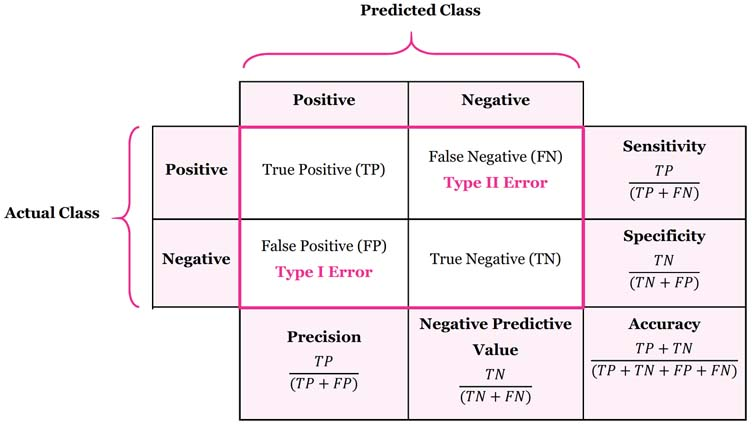

#### Для подсчета метрик возьмем искусственную задачу, где определим истинные классы.

In [64]:
n = 100    # размер выборки
p = 0.1    # доля примеров класса 1

dist = stats.bernoulli(p)    # Сгенерируем n примеров с долей единиц равной p

y_true = dist.rvs(n)
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]


## Accuracy

**Accuracy** -  базовая метрика для определения точности алгоритма, которая подсчитывает количество правильно предсказанных объектов к общему числу объектов.


#### Введем следующие понятия для формального определения метрик:  
**True positives (TP)** — кол-во правильно предсказанных примеров положительного класса  
**True negatives (TN)** — кол-во правильно предсказанных примеров отрицательного класса  
**False positives (FP)** — кол-во неправильно предсказанных примеров положительного класса (ложных срабатываний)  
**False negatives (FN)** — кол-во неправильно предсказанных примеров отрицательного класса (ложных отрицаний)  
__Positives (P)__ - общее кол-во примеров положительного класса  
**Negatives (N)** - общее кол-во примеров отрицательного класса

Метрика **Accuracy** выражается следующим образом:
$$
accuracy = \frac{TP+TN}{Positive+Negative}
$$

При значительном дисбалансе классов метрика Accuracy дает нерелевантные результаты.   
Для случая дисбаланса классов существуют аналоги точности:  
- **Функционал качества Каппа Коэна:**  
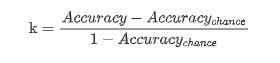
- **Сбалансированная точность:**  
\begin{equation}\mathrm{BA}=\frac{R_{1}+R_{0}}{2}=\frac{1}{2}\left(\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}+\frac{\mathrm{TN}}{\mathrm{TN}+\mathrm{FP}}\right)\end{equation}

In [65]:
# Функция, которая реализует алгоритм подсчета Accuracy
def calc_accuracy(y_true, y_pred):
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    acc = (TP + TN) / (P + N)
    
    return acc, TP, TN, P, N

In [97]:
# Сделаем предсказание двугранной монетки для нашей выборки
y_pred = np.array([monetka(2) for _ in range(n)])

# Посчитаем значение accuracy
acc, TP, TN, P, N = calc_accuracy(y_true, y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP, TN, P, N, acc * 100))

TP = 7
TN = 43
P = 13
N = 87
acc = 50.0%


In [98]:
# Функция accuracy_score библиотеки scikit-learn
acc = accuracy_score(y_true, y_pred)
print('Accuracy: {}%'.format(acc * 100))

Accuracy: 50.0%


Наш алгоритм работает с точностью 50% (может отличаться от запуска к запуску). Совсем неплохо для случайной монетки. Попробуем улучшить результат. Нам известно, что выборка приблизительно на 90% состоит из примеров отрицательного класса. Тогда пусть наша монетка будет однобокой и всегда будет выдавать 0 в качестве ответа:

In [124]:
y_pred = np.zeros(n)

acc, TP, TN, P, N = calc_accuracy(y_true, y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP, TN, P, N, acc * 100))

TP = 0
TN = 87
P = 13
N = 87
acc = 87.0%


Теперь показатель **accuracy практически равен 90%**. На самом деле монетка предсказывает только один класс, абсолютно игнорируя второй. В этом и есть главная проблема метрики accuracy: **если выборка содержит разное количество примеров каждого класса, то добиться высокой точности можно даже просто не предсказывая редкие классы**.  
Для таких несбалансированных выборок accuracy не может являться ключевой метрикой. Далее мы рассмотрим метрики (**precision, recall и F1-score**), которые более применимы для случаев дисбаланса классов.

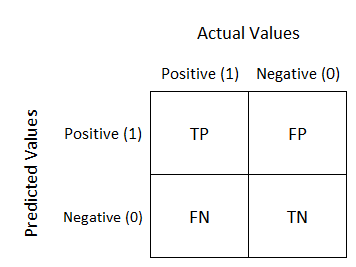

## Precision и Recall

**Precision** — метрика, показывающая, как много предсказанных положительных объектов действительно являются положительными.  
**Recall** — метрика, показывающая, как много положительных объектов модель нашла среди всех положительных объектов.

$$
precision = \frac{TP}{TP+FP} \quad recall = \frac{TP}{TP+FN}
$$

Интересный факт про обе метрики заключается в том, что при возрастании одной общей тенденцией второй является падение. В некотором смысле они противоположны. 

Посчитаем метрики precision и recall

In [127]:
precision = precision_score(y_true, 1 - y_pred)
recall = recall_score(y_true, 1 - y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

precision: 0.13
recall: 1.00


Вернемся к случаю, где модель выбирает положительный и отрицательный классы с равной вероятностью:

In [128]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

precision: 0.00
recall: 0.00


C:\DsAngelina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


На практике часто применяются объединяющие метрики, такие как F1-score.

## F1-score

**F1-score** — среднее гармоническое precision и recall:

$$
F1\_score = \frac{2*precision*recall}{precision+recall}
$$



F1-score является частным случаем **F-beta score**:  
\begin{equation}F_{\beta}=\left(1+\beta^{2}\right) \cdot \frac{\text { precision } \cdot \text { recall }}{\left(\beta^{2} \cdot \text { precision }\right)+\text { recall }}\end{equation}

In [129]:
# Посчитаем F1-score для задачи с монеткой
f1 = f1_score(y_true, y_pred)
print(f'F1-score: {f1:.2f}')

F1-score: 0.00


Чем выше значение F1-score, тем лучше.  Как видим, алгоритм, который делает предсказания, основываясь на случайном выборе, работает неудовлетворительно.  

## Precision-recall curve

**precision-recall curve** показывает зависимость precision от recall, т.е. насколько точно алгоритм выбирает положительные объекты при изменении его чувствительности к положительному классу.

In [130]:
# Посчитаем precision-recall curve для задачи с монеткой
precisions, recalls, _ = precision_recall_curve(y_true, y_pred)

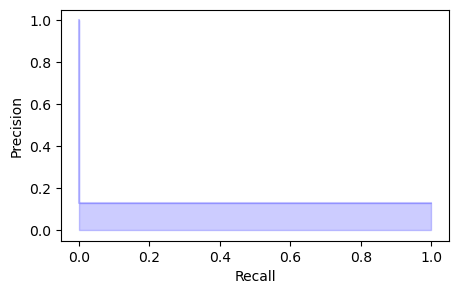

In [137]:
plt.step(recalls, precisions, color = 'b', alpha = 0.2, where = 'post')
plt.fill_between(recalls, precisions, step = 'post', alpha = 0.2, color = 'b')
plt.xlabel('Recall');
plt.ylabel('Precision');  # Видно, что случайная модель очень плохая

**Еще одной обобщающей характеристикой precision и recall является *Average precision (AP)*, которая вычисляется как взвешенное среднее значений precision:**
$$
AP = \sum_{n}{(R_n - R_{n-1})P_n},
$$
где $P_n$ и $R_n$ — precision и recall при $n$-ом отсечении. В некотором приближении значение AP есть значение иной характеристики, называемой **area under curve (AUC)** (площадь под кривой), являющейся важной метрикой при разработке классификаторов и детекторов.

Вычислим AP

In [132]:
ap = average_precision_score(y_true, y_pred)
print('Average Precision (AP) = {:.2f}'.format(ap))  # Average Precision случайной модели очень низкий

Average Precision (AP) = 0.13


## Confusion matrix

[confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) — матрица, в строках которой отображено число примеров, предсказанных в определенном классе, а в столбцах число примеров, которые в самом деле принадлежат каждому классу. С помощью confusion matrix можно удобно смотреть, в какую сторону отклоняются предсказания алгоритма при виде объектов определенного класса.

Вернемся к задаче с ирисами и посчитаем confusion matrix 

In [58]:
# Определим количество примеров, классов и сформируем словарь для конвертации имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y_true = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])

conf_m = confusion_matrix(y_true, y_pred).T
print(f'Confusion matrix:\n{conf_m}')

Confusion matrix:
[[18 14 11]
 [17 20 24]
 [15 16 15]]


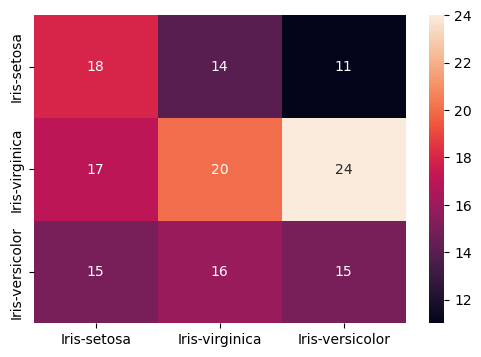

In [59]:
# Изобразим confusion matrix
class_names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
df_cm = pd.DataFrame(conf_m, index = class_names, columns = class_names)
plt.figure(figsize = (6, 4))
sns.heatmap(df_cm, annot = True);

Значение этой метрики показывает неудовлетворительный результат.

# 2. Практика  

### 2.1 Построим бинарный классификатор, предсказывающий пол обладателя записи голоса, и  посчитаем значение метрик Accuracy и F1_score

#### Для этого будем использовать модель LogisticRegression из библиотеки sklearn.   

Загрузим данные voiceDataSet.csv.  
В датасете есть ряд свойств, определенных по аудиозаписям:
- meanfreq: средняя частота голоса (в кГц)  
- sd: стандартное отклонение частоты голоса  
- median: медианная частота (в кГц)  
- Q25: значение в первом квартиле (в кГц)  
- Q75: значение в третьем квартиле (в кГц)  
- IQR: интерквартильный размах (в кГц)  
- skew: ассиметрия  
- kurt: эксцесс  
- sp.ent: спектральная энтропия  
- sfm: энтропия Винера  
- mode: мода частоты  
- centroid: частотный центроид  
- meanfun: средняя основная частота, измеренная по акустическому сигналу  
- minfun:  минимальная основная частота, измеренная по акустическому сигналу  
- maxfun: максимальная основная частота, измеренная в акустическом сигнале  
- meandom: среднее значение доминирующей частоты, измеренной по акустическому сигналу  
- mindom: минимум доминирующей частоты, измеренной в акустическом сигнале  
- maxdom: максимум доминирующей частоты, измеренной в акустическом сигнале  
- dfrange: диапазон доминантных частот, измеренное на звуковой сигнал  
- modindx: индекс модуляции голоса

Сконвертируем целевой стобец  'balance_due'  в бинарные значения.  
Разделим данные на обучающую и тестовую выборки (test_size = 0.3, random_state = 42).  
Нормализуем данные и обучим линейную регрессию из scikit-learn.

In [147]:
# Загрузим датасет и посмотрим на данные
voice_data = pd.read_csv('voiceDataSet.csv')
display(voice_data.head(5))
voice_data.info()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [148]:
# Сконвертируем целевой стобец в бинарные значения
voice_data.label = (voice_data.label == 'male').astype('int32')

# Разобьем таблицу данных на матрицы X и Y. Разделим выборку на обучающую и тренировочную 
X = voice_data[list(set(voice_data.columns) - set(['label']))].values
y = voice_data.label.values
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Нормализуем данные
skaler = StandardScaler()
skaler.fit(X_train, X_valid)
X_train_norm, X_valid_norm = skaler.transform(X_train), skaler.transform(X_valid)

# Обучим модель и посчитаем метрики Accuracy и F1
model = LogisticRegression().fit(X_train_norm, y_train)
y_pred = model.predict(X_valid_norm)
print(f'Accuracy: {accuracy_score(y_valid, y_pred):.03}')
print(f'F1: {f1_score(y_valid, y_pred):.03}')

Accuracy: 0.973
F1: 0.974


### 2.2  Построим мультиклассовый классификатор для определения типа стекла по его характеристикам

####  Для этого будем использовать метод k-ближайших соседей (k Nearest Neighbors - kNN).  Посчитаем метрики качества

In [156]:
# Загрузим данные 
glass = pd.read_csv('glass.csv')
display(glass.head(3))

# Посмотрим на данные
# В первых столбцах показатели содержания различных веществ в стекле, а в последнем (Type) — тип стекла
display(glass.info())

# Определим количество классов
print()
print(f'Уникальных значений целевой переменной: {glass["Type"].nunique()}')
glass['Type'].value_counts()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


None


Уникальных значений целевой переменной: 6


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [164]:
# Разобьем таблицу данных на матрицы X и y 
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

# Обучим модель и посчитаем Accuracy
# KNeighborsClassifier (так называемый "ленивый классификатор")-  один из простейших методов классификации 
model = KNeighborsClassifier(n_neighbors = 3)
kf = KFold(n_splits = 5)

accuracy = cross_val_score(model, X, y, cv = kf, scoring = "accuracy")
print(f'Значения Accuracy по пяти подвыборкам: {accuracy}')
print(f'Среднее значение Accuracy: {round(accuracy.mean(),2)}')

Значения Accuracy по пяти подвыборкам: [0.44186047 0.65116279 0.3255814  0.34883721 0.07142857]
Среднее значение Accuracy: 0.37


C:\DsAngelina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\DsAngelina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Результаты классификации демонстрируют невысокие значения точности и достаточно большой разброс. Это произошло в силу очень маленькой выборки в условиях большого количества классов (6 классов и около 200 наблюдений — крайне мало для получения высокого качества модели). Также низкие результаты обусловлены применением довольно простого алгоритма.

In [ ]:
# Изменим количество разбиений на 10. Вычислим среднее значение метрики Accuracy по 10 разбиениям
model_2 = KNeighborsClassifier(n_neighbors = 3)
kf = KFold(n_splits = 10)
cross_val_score(model, X, y, cv = kf, scoring = 'accuracy')
print(f'Среднее значение метрики Accuracy: {np.mean(cross_val_score(model, X, y, cv = kf, scoring = "accuracy")):.03}')
# Среднее значение метрики Accuracy: 0.526

### 2.3 Построим классификатор для диагностики болезни сердца по различным медицинским параметрам пациентов

#### Для этого сравним модели LogisticRegression и KNeighborsClassifier.  Посчитаем значение roc_auc_score

In [369]:
# Загрузим датасет и посмотрим на данные
heart_des = pd.read_csv('heart_fin1.csv', sep = ';')
display(heart_des.head(3))
display(heart_des.info())
heart_des.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,0,150,0,2.3,1
1,37,1,2,130,250,1,187,0,3.5,1
2,41,0,1,130,204,0,172,0,1.4,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   target    303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.8 KB


None

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.528053,149.646865,0.326733,1.039604,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.525860,22.905161,0.469794,1.161075,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,1.000000,153.000000,0.000000,0.800000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,1.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,1.000000


Посмотрим на распределение признаков

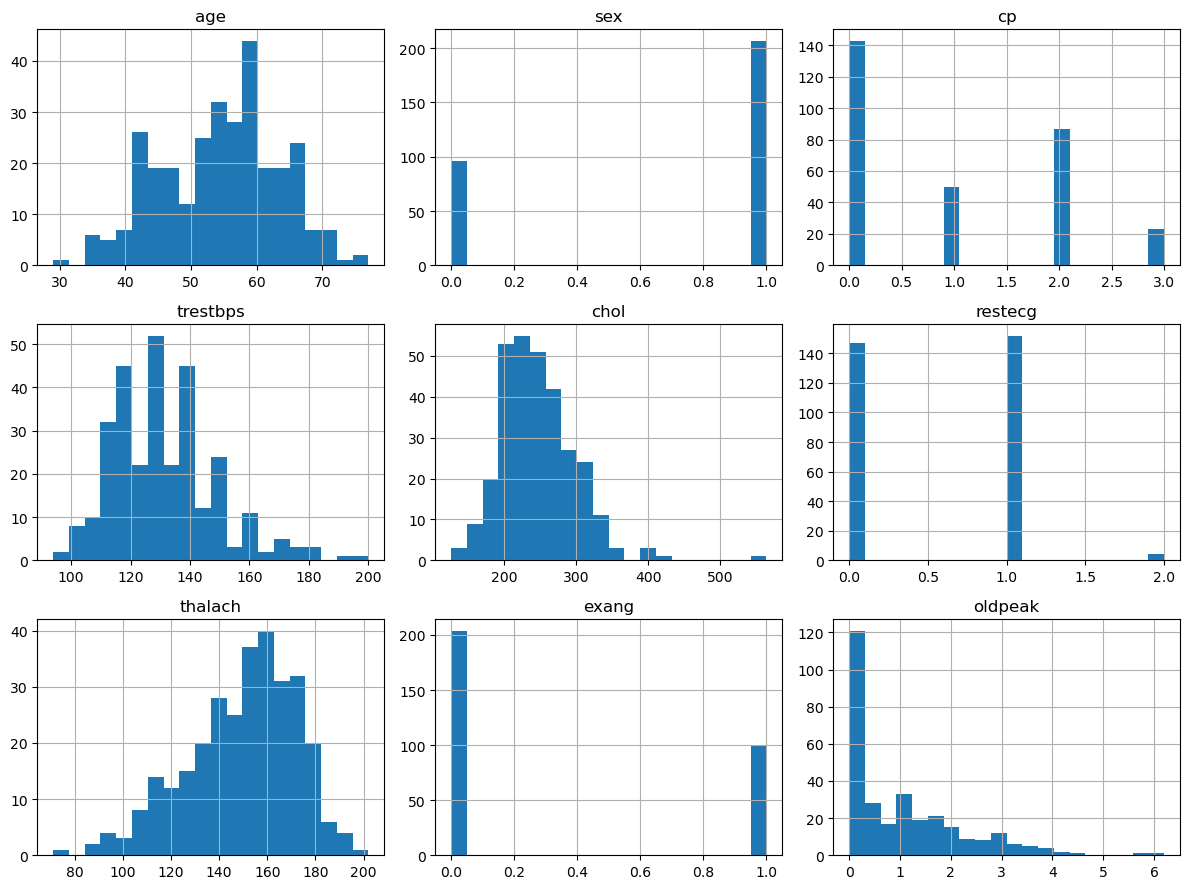

In [370]:
heart_des.drop('target', axis = 1).hist(figsize = (12,9), bins = 20)
plt.tight_layout()

**Графики показывают, что в данных присутствует большое количество выбросов.** Избавимся от выбросов, чтобы они не ухудшили качество модели. Для этого удалим все значения признаков которые отклоняются от первого или третьего квартиля более чем на 1.5 межквартильного размаха.

In [67]:
def outliers_iqr(x):
    # Функция для определения выбросов при помощи IQR
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75)
    IQR = quantile_3 - quantile_1
    lower_bound = quantile_1 - IQR * 1.5
    upper_bound = quantile_3 + IQR * 1.5
    return np.where((x < lower_bound) | (x > upper_bound))[0]

In [403]:
for col in heart_des.drop(['sex', 'target'], axis = 1).columns:
    if len(outliers_iqr(heart_des[col])) > 0:
        print(f'Количество значений, опеределенных как выбросы в признаке "{col}": {len(outliers_iqr(heart_des[col]))}')

Количество значений, опеределенных как выбросы в признаке "trestbps": 9
Количество значений, опеределенных как выбросы в признаке "chol": 5
Количество значений, опеределенных как выбросы в признаке "thalach": 1
Количество значений, опеределенных как выбросы в признаке "oldpeak": 5


In [419]:
outliers_ = []
for col in heart_des.drop(['sex', 'target'], axis = 1).columns:
    if len(outliers_iqr(heart_des[col])) > 0:
        outl = outliers_iqr(heart_des[col]).tolist()
        outliers_.append(outl)

print(f'Общее количество выбросов: {len(set(np.concatenate(outliers_)))}')
outliers_ = set(np.concatenate(outliers_))

heart_des = heart_des.drop(outliers_)
print(f'Размер датасета после удаления выбросов: {heart_des.shape}')    

Общее количество выбросов: 19
Размер датасета после удаления выбросов: (284, 10)


#### Обучим LogisticRegression и KNeighborsClassifier, вычислим метрки качества и определим, у какой модели выше значение ROC AUC

In [420]:
# Разобьем выборку на тестовую и обучающую
X = heart_des.iloc[:, :-1]
y = heart_des.iloc[:, -1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.15, random_state = 5)

# Обучим модель LogisticRegression и посчитаем значение roc_auc_score
model_log_regr = LogisticRegression(max_iter = 100).fit(X_train, y_train)
y_pred_log_regr = model_log_regr.predict(X_valid)
print(f'Модель LogisticRegression, значение roc_auc_score: {roc_auc_score(y_valid, y_pred_log_regr):.03}')

# Обучим модель KNeighborsClassifier и посчитаем значение roc_auc_score
model_knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_valid)
print(f'Модель KNeighborsClassifier, значение roc_auc_score: {roc_auc_score(y_valid, y_pred_knn):.03}')

Модель LogisticRegression, значение roc_auc_score: 0.811
Модель KNeighborsClassifier, значение roc_auc_score: 0.623


C:\DsAngelina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\DsAngelina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

### 2.4 Построим классификатор, показывающий, выжил ли человек при крушении Титаника    

#### Для этого будем использовать модель DecisionTreeClassifier. Посчитаем значение метрик

In [427]:
# Загрузим датасет и проведем небольшую обработку данных
titanic = pd.read_csv('titanic.csv')
display(titanic.head(3))
display(titanic.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [428]:
# Применим one-hot encoding к некоторым признакам
titanic = pd.get_dummies(titanic, columns = ['Sex', 'Cabin', 'Embarked'])

# Исключим признаки Name, Ticket и PassengerId
titanic = titanic.drop(['Name', 'Ticket', 'PassengerId'], axis = 1).dropna()

# Разделим данные на X и y. Валидация на hold-out выборке 
X, y = titanic.iloc[:, 1:], titanic.iloc[:, 0]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 123)

# Обучим классификатор
clf = DecisionTreeClassifier(random_state = 456).fit(X_train, y_train)

# Сравним точность показателей f1-score при обучении и при валидации
y_pred_train = clf.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'[train] f1-score = {f1_train:.2f}')

y_pred_valid = clf.predict(X_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
print(f'[valid] f1-score = {f1_valid:.2f}')

[train] f1-score = 0.99
[valid] f1-score = 0.68


Точность при валидации значительно ниже точности при обучении. Проверим это дополнительно с помощью **кросс-валидации**

In [433]:
clf = DecisionTreeClassifier(random_state = 456)
cv_metrics = cross_validate(clf, X, y, cv = 5, scoring = 'f1_micro', return_train_score = True)
cv_metrics

{'fit_time': array([0.00897455, 0.00598216, 0.00598359, 0.00697947, 0.00495219]),
 'score_time': array([0.00299478, 0.00498772, 0.00399113, 0.00598383, 0.00302672]),
 'test_score': array([0.74125874, 0.81818182, 0.78321678, 0.75524476, 0.83098592]),
 'train_score': array([0.98949212, 0.99649737, 0.99299475, 0.99124343, 0.98776224])}

In [434]:
def plot_cv_metrics(cv_metrics):
    avg_f1_train, std_f1_train = cv_metrics['train_score'].mean(), cv_metrics['train_score'].std()
    avg_f1_valid, std_f1_valid = cv_metrics['test_score'].mean(), cv_metrics['test_score'].std()
    print('[train] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_train, std_f1_train))
    print('[valid] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_valid, std_f1_valid))
    
    plt.figure(figsize = (15, 5))

    plt.plot(cv_metrics['train_score'], label = 'train', marker = '.')
    plt.plot(cv_metrics['test_score'], label = 'valid', marker = '.')

    plt.ylim([0., 1.]);
    plt.xlabel('CV iteration', fontsize = 15)
    plt.ylabel('F1-score', fontsize = 15)
    plt.legend(fontsize = 15)

[train] F1-score = 0.99 +/- 0.00
[valid] F1-score = 0.79 +/- 0.03


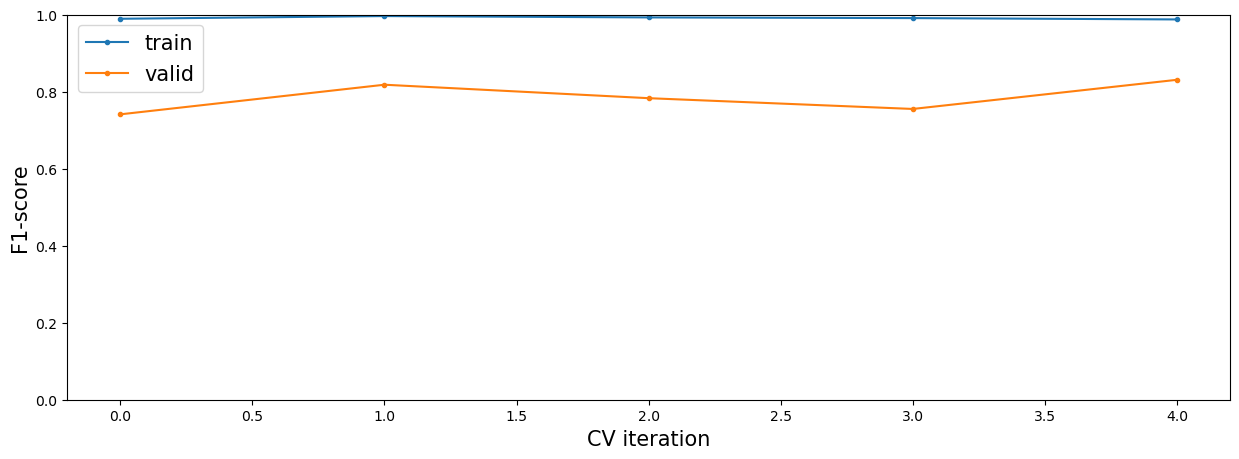

In [435]:
plot_cv_metrics(cv_metrics)

Гипотеза о переобучении подтвердилась. Попробуем избавиться от него, упростив модель — в данном случае ограничим глубину дерева:

[train] F1-score = 0.86 +/- 0.01
[valid] F1-score = 0.80 +/- 0.05


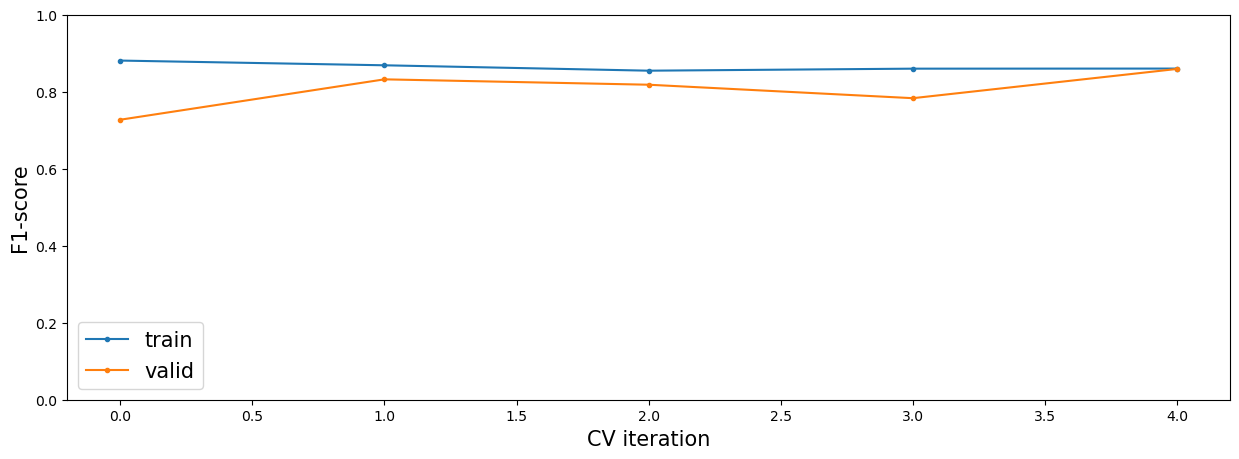

In [444]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 456)
cv_metrics = cross_validate(clf, X, y, cv = 5, scoring = 'f1_micro', return_train_score = True)
plot_cv_metrics(cv_metrics)

Метрики при обучении и валидации практически сравнялись, к тому же на валидации значение точности стало выше.  
Для улучшения точности предсказаний можно заняться созданием новых признаков и обогощением данных.

### Дисбаланс классов
**На представленных ниже графиках мы видим, что распределение значений неравномерно: одних значений очень много, других — слишком мало.**  
Сложно сказать, что выборка несбалансированная, потому что значения не сильно отличаются. Нет точного определения, когда считать выборку несбалансированной. Неформально считается, что выборка несбалансированна, когда отношение количества преобладающего и минорного классов составляет 10:1.

(array([374., 163.,  40.,  38.,  39.,  12.,  10.,  10.,   8.,   2.,   0.,
          0.,   4.,   3.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

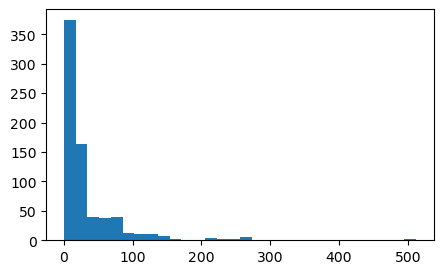

In [445]:
plt.hist(titanic['Fare'], bins = 30)

Признак 'Fare' обозначает стоимость билета на корабль. По гарфику видно, что относительно дешевых билетов намного больше чем дорогих. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

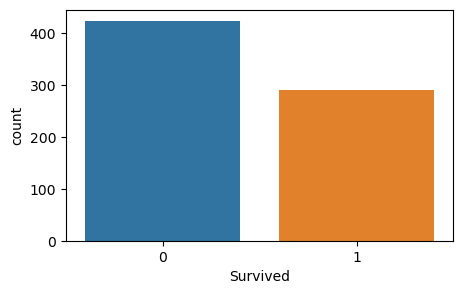

In [446]:
sns.countplot(x = 'Survived', data = titanic)

**Что происходит при дисбалансе классов:**
1. У алгоритма появляется склонность к более популярным классам / значениям.
1. Невозможность использования метрик, не учитывающих веса классов (базовая метрика accuracy не может быть использована).

**Решение проблемы дисбаланса классов**  
1. Изменить целевую метрику — в задачах классификации Confusion Matrix, Precision, Recall, F1-score, ROC-AUC будут намного корректнее описывать алгоритм, чем Accuracy.
1. Изменить выборку данных: 1) Oversampling — увеличение кол-ва объектов классов-меньшинств; 2) Undersampling — сокращение кол-ва объектов превалирующих классов.
1. Добавить штраф в оптимизационный функционал, прямо пропорциональный кол-ву объектов каждого класса (веса классов).
1. Возможно, есть смысл перейти к задачам [Anomaly detection](https://en.wikipedia.org/wiki/Anomaly_detection) и [Change detection](https://en.wikipedia.org/wiki/Change_detection).

**Увеличение кол-ва объектов классов-меньшинств (oversampling)** может быть выполнено как простым дублированием примеров меньшего класса, так и и более сложной техникой, называемой "аугментацией выборки".

**Аугментация выборки (Data Augmentation)** — процесс генерации примеров из исходных путем их модификации. Примерами аугментации данных могут служить: повороты, масштабирование изображений, применение фильтров; для текста может быть незначительно изменен контекст и изменено склонение / спряжение слов.

Еще одна техника, которая может быть использована для oversampling это **обогащение данных**. При использовании этой техники данные находятся во внешних дополнительных источниках. Например, если банк решает скоринговую задачу, он может также расширить свой набор данных данными другого банка при их наличии.

### 2.5 Построим классификатор при помощи DecisionTreeClassifier и посчитаем значение  F1_score

В задаче будем использовать датасет train.csv. Целевая переменная - 'compliance'. 
- Проведем небольшую предобработку. Оставим в данных только признаки: 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance'. Избавимся от пропусков.  
- Разделим данные на обучающую и тестовую выборки в соотношении 70 / 30 без перемешивания.   
- Обучим DecisionTreeClassifier из scikit-learn со стандартными параметрами (random_state = 23).  
- Посчитаем значения метрики \(F1\) на тренировочной и тестовой выборках, посмотрим на разницу значений. 

In [449]:
# Загрузим и посомтрим на данные
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']]
display(vis_data.head(3))
display(vis_data.info())

# Удалим пропуски
vis_data = vis_data.dropna() 

# Разделим выборки на X и y, применим Hold-out разделение выборки
X, y = vis_data.iloc[:, :-1].values, vis_data.iloc[:, -1].values   
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, shuffle = False)  

# Обучим модель и посмотрим ее качество на тренировочной выборке
model = DecisionTreeClassifier(random_state = 23).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
f1_score_train = f1_score(y_train, y_pred_train)
print(f'\nЗначение F1_score на тренировочной выборке: {round(f1_score_train,3)}')

# Посмотрим качество алгоритма на валидационной выборке
y_pred_val = model.predict(X_valid)
f1_score_val = f1_score(y_valid, y_pred_val)
print(f'Значение F1_score на валидационной выборке: {round(f1_score_val,3)}')

# Посмотрим на разницу значений F1_score
result = f1_score_train - f1_score_val
print(f'\nРазница значений метрики F1_score на tarin и valid: {round(result,3)}')

,fine_amount,state_fee,late_fee,discount_amount,balance_due,compliance
0,250.0,10.0,25.0,0.0,305.0,0.0
1,750.0,10.0,75.0,0.0,75.0,1.0
2,250.0,0.0,0.0,0.0,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fine_amount      250305 non-null  float64
 1   state_fee        250306 non-null  float64
 2   late_fee         250306 non-null  float64
 3   discount_amount  250306 non-null  float64
 4   balance_due      250306 non-null  float64
 5   compliance       159880 non-null  float64
dtypes: float64(6)
memory usage: 11.5 MB


None


Значение F1_score на тренировочной выборке: 0.661
Значение F1_score на валидационной выборке: 0.58

Разница значений метрики F1_score на tarin и valid: 0.081


**Произошло переобучение модели**      
- **Сделаем датасет сбалансированным с помощью Undersampling**    
- Разделим выборки и обучим модель.    
- Посчитаем значение метрики \(F1\).   
- Вычтим из значения метрики на тестовой части сбалансированной выборки значение метрики на тестовой части несбалансированной выборки.

In [450]:
# Посмотрим на соотношение классов в исходном датасете
print('ИСХОДНЫЙ НЕСБАЛАНСИРОВАННЫЙ ДАТАСЕТ \nCоотношение классов:')
display(vis_data.compliance.value_counts())

# Выведем значения f1_score на тренировочной и валидационной выборке несбалансированного датасета
print(f'Значение метрики F1_score на тренировочной выборке несбалансированного датасета: {round(f1_score_train, 3)}')
print(f'Значение метрики F1_score на валидационной выборке несбалансированного датасета: {round(f1_score_val, 3)}')

# Сбалансируем датасет (undersampling) и посмотрим на соотношение классов 
undersampled_vis_data = pd.concat([vis_data[vis_data['compliance'] == 0.00]
                                   .iloc[:11597], vis_data[vis_data['compliance'] == 1.00]], ignore_index = True)

print('\nСБАЛАНСИРОВАННЫЙ ДАТАСЕТ \nCоотношение классов:')
display(undersampled_vis_data.compliance.value_counts())

# Разделим выборки 
X_new, y_new = undersampled_vis_data.iloc[:, :-1].values, undersampled_vis_data.iloc[:, -1].values 
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(X_new, y_new, test_size = 0.3, shuffle = False)

# Обучим модель
new_model = DecisionTreeClassifier(random_state = 23).fit(X_train_new, y_train_new)  

# Посчитаем значение f1_score на тренировочной выборке
y_pred_new_train = new_model.predict(X_train_new)
f1_score_new_train = f1_score(y_train_new, y_pred_new_train)  
print(f'\nЗначение f1_score на тренировочной выборке сбалансированного датасета: {round(f1_score_new_train, 3)}')

# Посчитаем значение f1_score на валидационной выборке
y_pred_new_valid = new_model.predict(X_valid_new)    
f1_score_new_valid = f1_score(y_valid_new, y_pred_new_valid)  
print(f'Значение f1_score на валидационной выборке сбалансированного датасета: {round(f1_score_new_valid, 3)}')


# Посмотрим на разницу значений F1_score
result = f1_score_new_valid - f1_score_val
print(f'\nРазница значения F1_score на валидационной части сбалансированной и несбалансированной выборок: {round(result, 3)}')

ИСХОДНЫЙ НЕСБАЛАНСИРОВАННЫЙ ДАТАСЕТ 
Cоотношение классов:


0.0    148283
1.0     11597
Name: compliance, dtype: int64

Значение метрики F1_score на тренировочной выборке несбалансированного датасета: 0.661
Значение метрики F1_score на валидационной выборке несбалансированного датасета: 0.58

СБАЛАНСИРОВАННЫЙ ДАТАСЕТ 
Cоотношение классов:


0.0    11597
1.0    11597
Name: compliance, dtype: int64


Значение f1_score на тренировочной выборке сбалансированного датасета: 0.923
Значение f1_score на валидационной выборке сбалансированного датасета: 0.763

Разница значения F1_score на валидационной части сбалансированной и несбалансированной выборок: 0.183


## Проблема переобучения и недообучения

**Переобучение (overfitting)** — проблема, при которой алгоритм чувствителен к незначительным колебаниям в данных в процессе обучения. Из-за этого алгоритм затачивается под обучающий набор данных.  

**Основные способы борьбы с переобучением:**  
- Отложенная выборка (hold-out).  
- k-fold валидация или leave-one-out валидация.  
- Уменьшение сложности модели.  
- Регуляризация.   
- Добавление данных. 

**Недообучение (underfitting)** — проблема, при которой алгоритм недостаточно хорошо изучил данные и пропускает важные зависимости.  

**Основные способы борьбы с недообучением:**   
- Усложнение модели.  
- Ослабление параметров регуляризации.

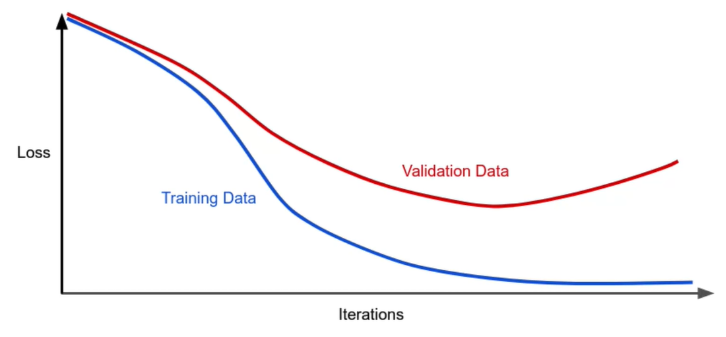